# Load data and word embeddings

In [1]:
import pickle
import numpy as np
from tqdm.notebook import tqdm

In [75]:
dset = pickle.load(open('data/dataset.pkl', 'rb'))
emb = pickle.load(open('data/glove.100.emb', 'rb'))
t2i, i2t, s2i, i2s, in2i, i2in = dset['t2i'], dset['i2t'], dset['s2i'], dset['i2s'], dset['in2i'], dset['i2in']
query_train, slot_train, intent_train = dset['query_train'], dset['slot_train'], dset['intent_train']
query_dev, slot_dev, intent_dev = dset['query_dev'], dset['slot_dev'], dset['intent_dev']
query_test, slot_test, intent_test = dset['query_test'], dset['slot_test'], dset['intent_test']

In [76]:
emb[0]

array([ 0.076296 ,  0.46698  ,  0.24043  , -0.54493  , -0.76845  ,
        0.26672  ,  0.11216  ,  0.56734  ,  0.076033 , -0.27706  ,
        0.45248  ,  0.51724  ,  0.32362  ,  0.091504 ,  0.05634  ,
       -0.524    , -0.20721  ,  0.51649  , -0.67075  ,  0.48205  ,
        0.28867  ,  0.65157  , -0.48648  , -0.76102  , -0.02283  ,
        0.24611  , -0.39278  , -0.73331  ,  0.55839  , -0.33026  ,
       -0.19114  ,  0.81568  ,  0.47729  ,  0.092823 ,  0.37974  ,
        0.48891  , -0.5457   ,  0.079161 ,  0.76341  , -0.20939  ,
        0.057473 , -0.14882  ,  0.019687 , -0.99513  , -0.55138  ,
        0.056469 ,  0.041785 , -0.41212  ,  0.18919  , -1.6145   ,
       -0.1376   ,  0.080443 ,  0.19311  ,  0.50921  , -0.20389  ,
       -2.0158   , -0.086976 ,  0.53815  ,  0.97154  ,  0.77924  ,
        0.008696 ,  1.2469   , -1.072    , -0.16083  ,  0.68654  ,
        0.20288  ,  0.93638  ,  0.4805   , -0.44977  , -0.16558  ,
        0.26256  ,  0.036439 ,  0.11474  , -0.28131  , -0.4003

In [77]:
print("Vocabulary size in dataset: {}".format(len(t2i)))
print("Number of sentense class in dataset: {}".format(len(in2i)))
print("Number of token class in dataset: {}".format(len(s2i)))
print("Word embedding shape VxD: {}".format(emb.shape))

Vocabulary size in dataset: 943
Number of sentense class in dataset: 26
Number of token class in dataset: 129
Word embedding shape VxD: (943, 100)


In [78]:
def print_sample(i, query, slot):
    print([i2t[k] for k in query[i]], i2in[intent_train[i][0]])
    print([i2s[k] for k in slot[i]],  i2in[intent_train[i][0]])

In [79]:
print_sample(1, query_train, slot_train)

['bos', 'please', 'list', 'information', 'regarding', 'san', 'francisco', 'airport', 'eos'] airport
['o', 'o', 'o', 'o', 'o', 'b-airport_name', 'i-airport_name', 'i-airport_name', 'o'] airport


In [80]:
print_sample(2, query_train, slot_train)

['bos', 'show', 'me', 'the', 'flights', 'from', 'oakland', 'to', 'denver', 'eos'] flight
['o', 'o', 'o', 'o', 'o', 'o', 'b-fromloc.city_name', 'o', 'b-toloc.city_name', 'o'] flight


In [81]:
print_sample(3, query_train, slot_train)

['bos', 'how', 'many', 'fare', 'codes', 'belong', 'to', 'economy', 'class', 'eos'] quantity
['o', 'o', 'o', 'o', 'o', 'o', 'o', 'b-economy', 'i-economy', 'o'] quantity


# Pad datasets! query and slot

We use an additional symbol "pad", pad the sentences and query to have same lengths, and record their original length

In [82]:
from utils import pad_dataset

# add <pad> into the vocabulary
i2t[len(i2t)] = '<pad>'
t2i['<pad>'] = len(i2t) - 1
emb_padded = np.append(emb, np.zeros((1, 100)), axis=0)

seq_max_len = 30
query_train_padded, train_lengths = pad_dataset(query_train, seq_max_len, t2i['<pad>'])
query_dev_padded, dev_lengths = pad_dataset(query_dev, seq_max_len, t2i['<pad>'])
query_test_padded, test_lengths = pad_dataset(query_test, seq_max_len, t2i['<pad>'])
slot_train_padded, _ = pad_dataset(slot_train, seq_max_len, s2i['o'])
slot_dev_padded, _ = pad_dataset(slot_dev, seq_max_len, s2i['o'])
slot_test_padded, _ = pad_dataset(slot_test, seq_max_len, s2i['o'])

In [83]:
print("original lengths", [len(query_train[i]) for i in range(10)])
print("padded lengths", [len(query_train_padded[i]) for i in range(10)])
print("example padded query: ")
print_sample(2, query_train_padded, slot_train_padded)

original lengths [11, 9, 10, 10, 10, 13, 11, 8, 11, 25]
padded lengths [30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
example padded query: 
['bos', 'show', 'me', 'the', 'flights', 'from', 'oakland', 'to', 'denver', 'eos', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>'] flight
['o', 'o', 'o', 'o', 'o', 'o', 'b-fromloc.city_name', 'o', 'b-toloc.city_name', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'] flight


# dataset and dataloader for slot filling and intent classification

In [84]:
config = {
    'bz': 10, # batch size
    'rnn': 'RNN',
    'bidirection': False,
    'rnn_hidden_dim': 200,
    'epoch': 20,
}

In [85]:
from torch.utils.data import DataLoader, Dataset

In [86]:
class IntentBatchDataset(Dataset):

    def __init__(self, query, lengths, intent):
        self.dataset = query
        self.intent = intent
        self.lengths = lengths

    def __getitem__(self, idx):

        return {
            'x': np.array(self.dataset[idx], dtype=np.int32),
            'in': np.array(self.intent[idx], dtype=np.int32),
            'l': np.array(self.lengths[idx], dtype=np.int32),
        }

    def __len__(self):
        return len(self.dataset)

In [87]:
intent_dataset_train = IntentBatchDataset(query_train_padded, train_lengths, intent_train)
intent_dataset_dev = IntentBatchDataset(query_dev_padded, dev_lengths, intent_dev)
intent_dataset_test = IntentBatchDataset(query_test_padded, test_lengths, intent_test)

In [88]:
bz = config['bz']
intent_dataloader_train = DataLoader(intent_dataset_train, batch_size=bz)
intent_dataloader_dev = DataLoader(intent_dataset_dev, batch_size=bz)
intent_dataloader_test = DataLoader(intent_dataset_test, batch_size=bz)

# Model for intent classification

In [89]:
import torch
from torch import nn
from torch.nn.utils.rnn import pad_packed_sequence, pack_padded_sequence

class IntentNeuralSoftmax(nn.Module):
    def __init__(self, pretrained_embed, intent_size, config):
        super(IntentNeuralSoftmax, self).__init__()

        self.bidirection = config['bidirection']
        self.directions = 2 if self.bidirection else 1
        self.is_cuda = torch.cuda.is_available()
        self.V, self.D = pretrained_embed.shape
        self.rnn_type = config['rnn']
        self.rnn_hidden_dim = config['rnn_hidden_dim'] // 2 if \
            self.bidirection else config['rnn_hidden_dim'] 

        self.intent_size = intent_size

        self.loss = nn.CrossEntropyLoss()

        if self.rnn_type == 'RNN':
            self.rnn = nn.RNN(input_size=self.D,
                              hidden_size=self.rnn_hidden_dim,
                              num_layers=1,
                              batch_first=True,
                              bidirectional=self.bidirection,
                              bias=False)

        elif self.rnn_type == 'LSTM':
            self.rnn = nn.LSTM(input_size=self.D,
                               hidden_size=self.rnn_hidden_dim,
                               num_layers=1,
                               batch_first=True,
                               bidirectional=self.bidirection,
                               bias=False)

        self.embedding = nn.Embedding.from_pretrained(torch.from_numpy(pretrained_embed).float(),
                                                      freeze=True)  # V x D

        self.linear_intent = nn.Linear(self.rnn_hidden_dim*self.directions, self.intent_size)

    def forward(self, input, label_intent, lengths):
        input = self.embedding(input)  # B x L -> B x L x D
        pack_padded_seq_input = pack_padded_sequence(input, 
                                                     lengths.cpu(), 
                                                     batch_first=True,
                                                     enforce_sorted=False)

        B, L, D = input.size()

        if self.rnn_type in ['RNN']:
            output_packed, hn = self.rnn(pack_padded_seq_input)  # B x L x H
        elif self.rnn_type == 'LSTM':
            output_packed, (hn, cn) = self.rnn(pack_padded_seq_input)  # B x L x H

        output_padded, output_lengths = pad_packed_sequence(output_packed, batch_first=True)

        # intent classification
        last_hidden = output_padded[torch.arange(B), output_lengths-1, :] # B x H
        score_intent = self.linear_intent(last_hidden)

        loss_intent, pred_labels_intent = \
            self.calculate_intent_loss(score_intent, label_intent)

        return loss_intent, pred_labels_intent

    def calculate_intent_loss(self, scores_intent, label_intent):
        loss = self.loss(scores_intent, label_intent.squeeze())
        max_score_intent, pred_labels_intent = scores_intent.max(dim=1)
        return loss, pred_labels_intent


# funciton: validate, train and metrics

In [90]:
from utils import eval_acc

def val(data, model):
    all_pred_intent_label = []
    all_true_intent_label = []
    all_lengths = []
    model.eval()
    with torch.no_grad():

        for batch in data:

            x = batch['x'].long()
            label_intent = batch['in'].long()
            lengths = batch['l'].long()

            loss_intent, pred_intent_label = model(x, label_intent, lengths)

            all_pred_intent_label += list(pred_intent_label.cpu())
            all_true_intent_label += list(label_intent.cpu())
            all_lengths += list(lengths.cpu())

    acc_intent = eval_acc(
        sent_pred=all_pred_intent_label, sent_true=all_true_intent_label)

    model.train()
    return acc_intent

def train(data, model, optimizer):
    all_pred_intent_label = []
    all_true_intent_label = []
    all_lengths = []
    
    for batch in data:
        
        optimizer.zero_grad()

        x = batch['x'].long() # B x L, token index
        label_intent = batch['in'].long() # B, label (intent) index
        lengths = batch['l'].long() # B, lengths

        loss_intent, pred_intent_label = model(x, label_intent, lengths)
        loss_intent.backward()
        optimizer.step()

        all_pred_intent_label += list(pred_intent_label.cpu())
        all_true_intent_label += list(label_intent.cpu())
        all_lengths += list(lengths.cpu())

    acc_intent = eval_acc(
        sent_pred=all_pred_intent_label, sent_true=all_true_intent_label)

    return acc_intent

# init model and optimizer

In [91]:
# for padding
model = IntentNeuralSoftmax(pretrained_embed=emb_padded,
                           intent_size=len(in2i),
                           config=config)

pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('ALL TRAINABLE PARAMETERS: {}'.format(pytorch_total_params))

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0)
print(model)

ALL TRAINABLE PARAMETERS: 65226
IntentNeuralSoftmax(
  (loss): CrossEntropyLoss()
  (rnn): RNN(100, 200, bias=False, batch_first=True)
  (embedding): Embedding(944, 100)
  (linear_intent): Linear(in_features=200, out_features=26, bias=True)
)


# train and evaluation, do not use test for hyper-params tuning

In [92]:
from copy import deepcopy
train_acc_list = []
dev_acc_list = []
test_acc_list = [] # just for visualization

best_dev_acc = -1
best_model = model

for i in range(config['epoch']):
    
    train_acc = train(data=intent_dataloader_train, model=model, optimizer=optimizer)
    dev_acc = val(data=intent_dataloader_dev, model=model)
    test_acc = val(data=intent_dataloader_test, model=model)
    
    if dev_acc > best_dev_acc:
        best_dev_acc = dev_acc
        best_model = deepcopy(model)
    
    print('epoch: {}, train_acc: {}, dev_acc: {}: test_acc: {}'.
          format(i+1, train_acc, dev_acc, test_acc))
    train_acc_list.append(train_acc)
    dev_acc_list.append(dev_acc)
    test_acc_list.append(test_acc)
    
    
print('final test acc: {}'.format(val(data=intent_dataloader_test, model=best_model)))

epoch: 1, train_acc: 0.7790055248618785, dev_acc: 0.8263052208835341: test_acc: 0.7782754759238522
epoch: 2, train_acc: 0.8317428427925665, dev_acc: 0.8413654618473896: test_acc: 0.8040313549832027
epoch: 3, train_acc: 0.8239578101456555, dev_acc: 0.8634538152610441: test_acc: 0.8409854423292273
epoch: 4, train_acc: 0.8669010547463586, dev_acc: 0.8825301204819277: test_acc: 0.858902575587906
epoch: 5, train_acc: 0.8857358111501757, dev_acc: 0.892570281124498: test_acc: 0.864501679731243
epoch: 6, train_acc: 0.8982923154193873, dev_acc: 0.9006024096385542: test_acc: 0.8701007838745801
epoch: 7, train_acc: 0.9095931692616775, dev_acc: 0.9146586345381527: test_acc: 0.8678611422172452
epoch: 8, train_acc: 0.9121044701155199, dev_acc: 0.929718875502008: test_acc: 0.8745800671892497
epoch: 9, train_acc: 0.9178804620793571, dev_acc: 0.892570281124498: test_acc: 0.8633818589025756
epoch: 10, train_acc: 0.9261677548970366, dev_acc: 0.9206827309236948: test_acc: 0.8891377379619261
epoch: 11, tra

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'accuracy curves')

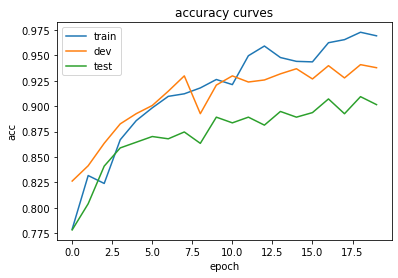

In [94]:
plt.plot(train_acc_list, label='train')
plt.plot(dev_acc_list, label='dev')
plt.plot(test_acc_list, label='test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('accuracy curves')

In [132]:
config = {
    'bz': 100, # batch size
    'rnn': 'LSTM',
    'bidirection': True,
    'rnn_hidden_dim': 100,
    'epoch': 20,
    'attention': 'mul', # ['dot', 'mul', 'add']
}

In [133]:
import torch
from torch import nn
from utils import get_length_mask
from torch.nn.utils.rnn import pad_packed_sequence, pack_padded_sequence


class DotAttention(nn.Module):
    def __init__(self, hidden_size):
        super(DotAttention, self).__init__()
        
        self.context_vector_s = \
            nn.Parameter(torch.randn((hidden_size)), requires_grad=True) # H
    
    def forward(self, hidden_states, lengths):
        # hidden states: B x L x H
        # lengths: B
        mask = get_length_mask(lengths) # B x L
        scores = torch.einsum('h,blh->bl', self.context_vector_s, hidden_states) # B x L
        exp_scores = torch.exp(scores)  
        exp_scores = exp_scores * mask # B x L
        exp_scores = exp_scores / exp_scores.sum(1).view(-1, 1) # B x L
        attended_hidden_state = torch.einsum('blh,bl->bh', hidden_states, exp_scores)
    
        return attended_hidden_state
    
class MulAttention(nn.Module):
    def __init__(self, hidden_size):
        super(MulAttention, self).__init__()
        
        self.context_vector_s = \
            nn.Parameter(torch.randn((hidden_size)), requires_grad=True) # H
        self.attend_matrix = \
            nn.Parameter(torch.randn((hidden_size, hidden_size)), requires_grad=True) # H x H
        nn.init.xavier_normal_(self.attend_matrix)
    
    def forward(self, hidden_states, lengths):
        # hidden states: B x L x H
        # lengths: B
        mask = get_length_mask(lengths) # B x L
        context_vec = torch.matmul(self.context_vector_s, self.attend_matrix)
        scores = torch.einsum('h,blh->bl', context_vec, hidden_states) # B x L
        exp_scores = torch.exp(scores)  
        exp_scores = exp_scores * mask # B x L
        exp_scores = exp_scores / exp_scores.sum(1).view(-1, 1) # B x L
        attended_hidden_state = torch.einsum('blh,bl->bh', hidden_states, exp_scores)
    
        return attended_hidden_state
        
    
class AddAttention(nn.Module):
    def __init__(self, hidden_size):
        super(MulAttention, self).__init__()
        self.v = nn.Parameter(torch.randn((hidden_size)), requires_grad=True) # H
        self.s = \
            nn.Parameter(torch.randn((hidden_size)), requires_grad=True) # H
        self.attend_matrix_h = \
            nn.Parameter(torch.randn((hidden_size, hidden_size)), requires_grad=True) # H x H
        self.attend_matrix_s = \
            nn.Parameter(torch.randn((hidden_size, hidden_size)), requires_grad=True) # H x H
        nn.init.xavier_normal_(self.attend_matrix_h)
        nn.init.xavier_normal_(self.attend_matrix_s)
        
        self.tanh = nn.Tanh()
        
    
    def forward(self, hidden_states, lengths):
        # hidden states: B x L x H
        # lengths: B
        mask = get_length_mask(lengths) # B x L
        context_vec = torch.matmul(self.s, self.attend_matrix_s)
        scores = torch.einsum('kh,blh->blh', self.attend_matrix_h, hidden_states) # B x L
        scores = scores + context_vec
        scores = self.tanh(scores) # blh
        scores = torch.einsum('h,blh->bl', self.v, scores)

        exp_scores = torch.exp(scores)  
        exp_scores = exp_scores * mask # B x L
        exp_scores = exp_scores / exp_scores.sum(1).view(-1, 1) # B x L
        attended_hidden_state = torch.einsum('blh,bl->bh', hidden_states, exp_scores)
    
        return attended_hidden_state    

class IntentNeuralSoftmaxWithAttention(nn.Module):
    def __init__(self, pretrained_embed, intent_size, config):
        super(IntentNeuralSoftmaxWithAttention, self).__init__()

        self.bidirection = config['bidirection']
        self.directions = 2 if self.bidirection else 1
        self.is_cuda = torch.cuda.is_available()
        self.V, self.D = pretrained_embed.shape
        self.rnn_type = config['rnn']
        self.rnn_hidden_dim = config['rnn_hidden_dim'] // 2 if \
            self.bidirection else config['rnn_hidden_dim'] 

        self.intent_size = intent_size

        self.loss = nn.CrossEntropyLoss()
        
        if config['attention'] == 'dot':
            self.attention_layer = DotAttention(config['rnn_hidden_dim'])
        elif config['attention'] == 'mul':
            self.attention_layer = MulAttention(config['rnn_hidden_dim'])
        elif config['attention'] == 'add':
            self.attention_layer = MulAttention(config['rnn_hidden_dim'])
            
            
        if self.rnn_type == 'RNN':
            self.rnn = nn.RNN(input_size=self.D,
                              hidden_size=self.rnn_hidden_dim,
                              num_layers=1,
                              batch_first=True,
                              bidirectional=self.bidirection,
                              bias=False)

        elif self.rnn_type == 'LSTM':
            self.rnn = nn.LSTM(input_size=self.D,
                               hidden_size=self.rnn_hidden_dim,
                               num_layers=1,
                               batch_first=True,
                               bidirectional=self.bidirection,
                               bias=False)

        self.embedding = nn.Embedding.from_pretrained(torch.from_numpy(pretrained_embed).float(),
                                                      freeze=True)  # V x D

        self.linear_intent = nn.Linear(self.rnn_hidden_dim*self.directions, self.intent_size)

    def forward(self, input, label_intent, lengths):
        input = self.embedding(input)  # B x L x D
        pack_padded_seq_input = pack_padded_sequence(input, lengths.cpu(), batch_first=True, enforce_sorted=False)

        B, L, D = input.size()

        if self.rnn_type in ['RNN']:
            output_packed, hn = self.rnn(pack_padded_seq_input)  # B x L x H
        elif self.rnn_type == 'LSTM':
            output_packed, (hn, cn) = self.rnn(pack_padded_seq_input)  # B x L x H

        output_padded, output_lengths = pad_packed_sequence(output_packed, batch_first=True)
        # B x L x H
        
        # intent classification
        final_hidden = self.attention_layer(output_padded, lengths)
        score_intent = self.linear_intent(final_hidden)

        loss_intent, pred_labels_intent = \
            self.calculate_intent_loss(score_intent, label_intent)

        return loss_intent, pred_labels_intent

    def calculate_intent_loss(self, scores_intent, label_intent):
        loss = self.loss(scores_intent, label_intent.squeeze())
        max_score_intent, pred_labels_intent = scores_intent.max(dim=1)
        return loss, pred_labels_intent


In [134]:
model = IntentNeuralSoftmaxWithAttention(
                           pretrained_embed=emb_padded,
                           intent_size=len(in2i),
                           config=config)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0)

In [135]:
from copy import deepcopy
train_acc_list = []
dev_acc_list = []
test_acc_list = [] # just for visualization

best_dev_acc = -1
best_model = model

for i in range(config['epoch']):
    
    train_acc = train(data=intent_dataloader_train, model=model, optimizer=optimizer)
    dev_acc = val(data=intent_dataloader_dev, model=model)
    test_acc = val(data=intent_dataloader_test, model=model)
    
    if dev_acc > best_dev_acc:
        best_dev_acc = dev_acc
        best_model = deepcopy(model)
    
    print('epoch: {}, train_acc: {}, dev_acc: {}: test_acc: {}'.
          format(i+1, train_acc, dev_acc, test_acc))
    train_acc_list.append(train_acc)
    dev_acc_list.append(dev_acc)
    test_acc_list.append(test_acc)
    
    
print('final test acc: {}'.format(val(data=intent_dataloader_test, model=best_model)))

epoch: 1, train_acc: 0.7041687594173782, dev_acc: 0.7439759036144579: test_acc: 0.7077267637178052
epoch: 2, train_acc: 0.7345554997488699, dev_acc: 0.7439759036144579: test_acc: 0.7077267637178052
epoch: 3, train_acc: 0.735811150175791, dev_acc: 0.7670682730923695: test_acc: 0.7458006718924972
epoch: 4, train_acc: 0.82245102963335, dev_acc: 0.8755020080321285: test_acc: 0.8107502799552072
epoch: 5, train_acc: 0.8751883475640382, dev_acc: 0.8855421686746988: test_acc: 0.8275475923852184
epoch: 6, train_acc: 0.8900050226017077, dev_acc: 0.9056224899598394: test_acc: 0.845464725643897
epoch: 7, train_acc: 0.9065796082370668, dev_acc: 0.9206827309236948: test_acc: 0.8622620380739082
epoch: 8, train_acc: 0.9236564540431944, dev_acc: 0.9327309236947792: test_acc: 0.8779395296752519
epoch: 9, train_acc: 0.9306880964339528, dev_acc: 0.9347389558232931: test_acc: 0.8801791713325868
epoch: 10, train_acc: 0.9414866901054746, dev_acc: 0.9337349397590361: test_acc: 0.8846584546472565
epoch: 11, tr

Text(0.5, 1.0, 'accuracy curves')

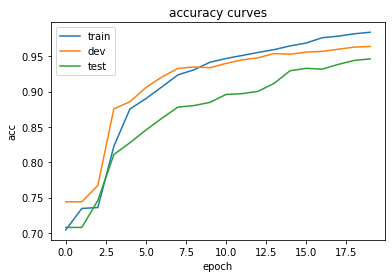

In [136]:
plt.plot(train_acc_list, label='train')
plt.plot(dev_acc_list, label='dev')
plt.plot(test_acc_list, label='test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('accuracy curves')

In [9]:
import torch
a = torch.randn((3,5,8))

In [10]:
b = torch.randn((5,2))

In [13]:
torch.einsum('qwr,we->rqe', a, b).size()

torch.Size([8, 3, 2])

In [14]:
a = torch.randn((2,3))
b = torch.randn((2,3))

In [15]:
a * b

tensor([[ 0.0551, -0.0229,  0.0178],
        [ 1.0396,  0.2477, -0.1978]])

In [16]:
torch.einsum('qw,qw->qw', a, b)

tensor([[ 0.0551, -0.0229,  0.0178],
        [ 1.0396,  0.2477, -0.1978]])